# Question 1

### 1. Are there significant differences in the physical exercise among different groups in the United States?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

In [15]:
data = pd.read_csv('final_sample.csv')
data.info(), data.head()

exercise_summary = data['X_pastae1'].value_counts()
exercise_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Columns: 330 entries, X_state to X_age80
dtypes: float64(100), object(230)
memory usage: 45.3+ MB


X_pastae1
Did not meet both guidelines    13664
Met both guidelines              2954
unknown                          1382
Name: count, dtype: int64

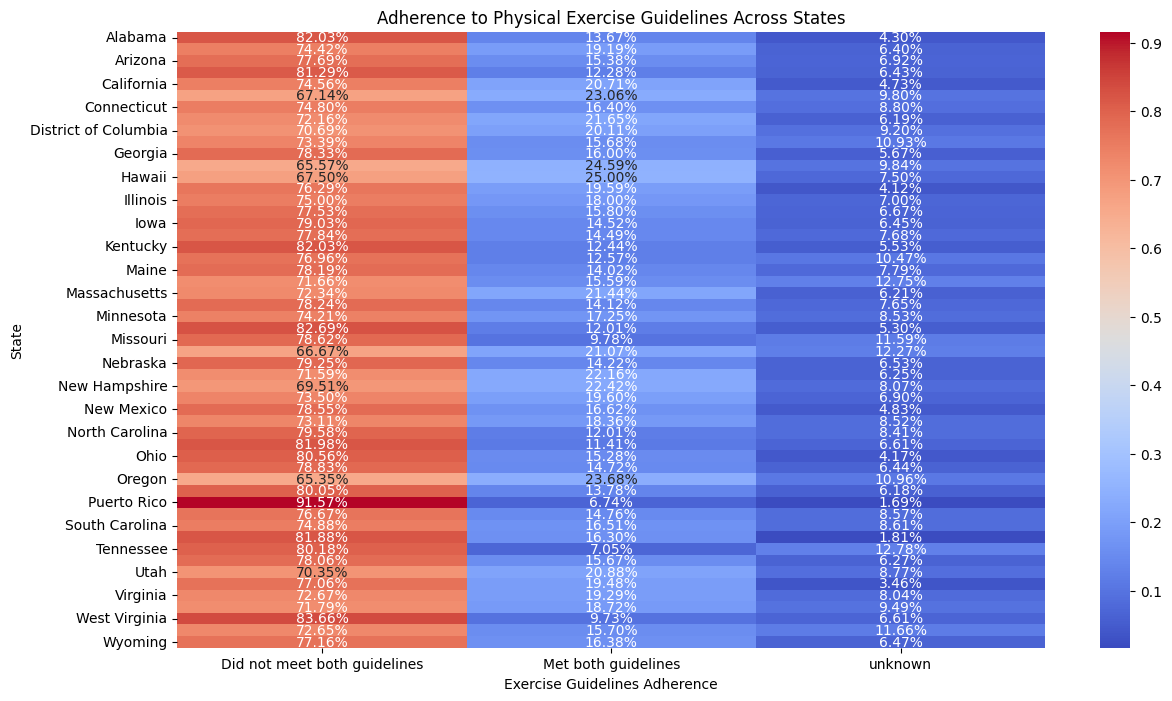

In [16]:
# Data preparation for visualization
state_exercise = data.groupby('X_state')['X_pastae1'].value_counts(normalize=True).unstack().fillna(0)

# Resetear el índice para que 'X_state' sea una columna y no un índice
state_exercise = state_exercise.reset_index()

plt.figure(figsize=(14, 8))
sns.heatmap(state_exercise.set_index('X_state'), annot=True, cmap='coolwarm', fmt=".2%")
plt.title('Adherence to Physical Exercise Guidelines Across States')
plt.ylabel('State')
plt.xlabel('Exercise Guidelines Adherence')
plt.show()

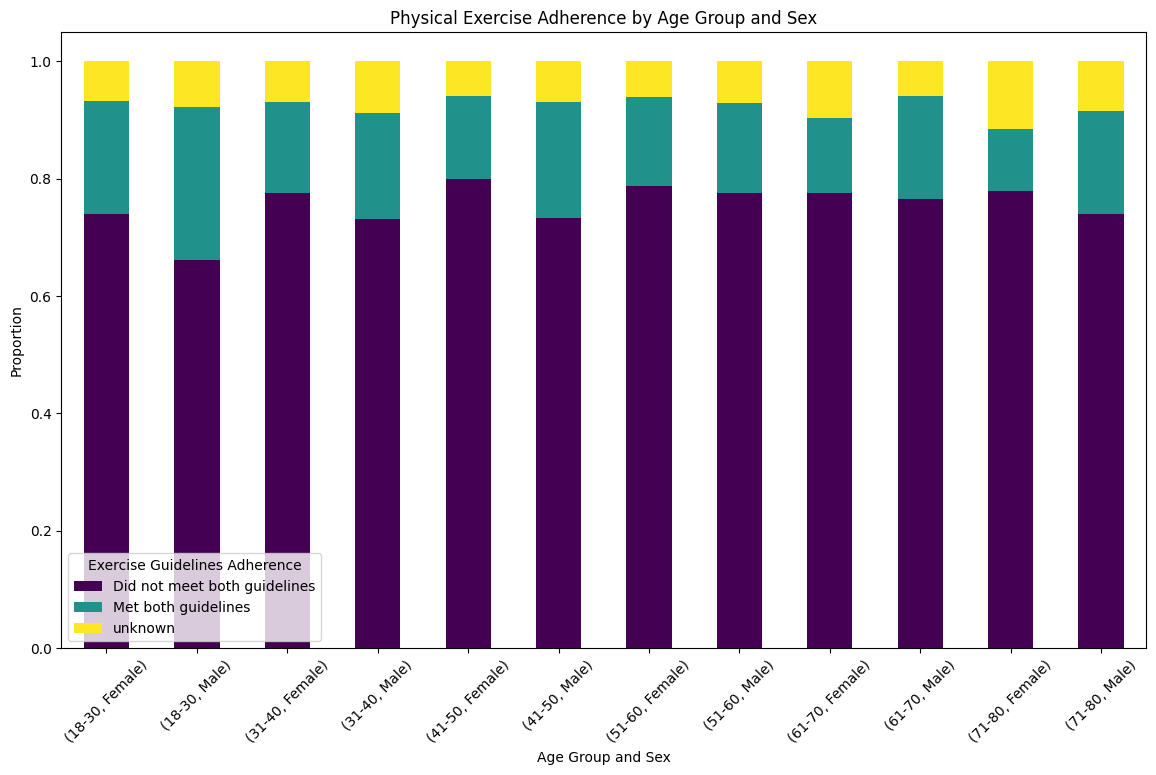

In [17]:
# Categorizing age data into groups
data['age_group'] = pd.cut(data['X_age80'],
                           bins=[17, 30, 40, 50, 60, 70, 80, 100],
                           labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])

# Creating a cross-tabulation of age group and exercise adherence
age_exercise = pd.crosstab(index=[data['age_group'], data['sex']], columns=data['X_pastae1'], normalize='index')

age_exercise_plot = age_exercise.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Physical Exercise Adherence by Age Group and Sex')
plt.xlabel('Age Group and Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Exercise Guidelines Adherence')
plt.show()


In [18]:
age_exercise

X_pastae1         Did not meet both guidelines  Met both guidelines   unknown
age_group sex                                                                
18-30     Female                      0.740146             0.192701  0.067153
          Male                        0.662128             0.260426  0.077447
31-40     Female                      0.775615             0.154713  0.069672
          Male                        0.730544             0.180753  0.088703
41-50     Female                      0.799163             0.142259  0.058577
          Male                        0.733831             0.196517  0.069652
51-60     Female                      0.787582             0.151961  0.060458
          Male                        0.775885             0.152905  0.071210
61-70     Female                      0.775100             0.128514  0.096386
          Male                        0.765706             0.175248  0.059046
71-80     Female                      0.778419             0.106751  0.114830
          Male                        0.739641             0.175414  0.084945

In [19]:
categories = []
cat_means = []

for cat in age_exercise.index:
    if cat[1] != 'unknown':
        categories.append(cat)
        cat_means.append(age_exercise.loc[cat, 'Met both guidelines'])

print(categories)
cat_means


[('18-30', 'Female'), ('18-30', 'Male'), ('31-40', 'Female'), ('31-40', 'Male'), ('41-50', 'Female'), ('41-50', 'Male'), ('51-60', 'Female'), ('51-60', 'Male'), ('61-70', 'Female'), ('61-70', 'Male'), ('71-80', 'Female'), ('71-80', 'Male')]


[0.1927007299270073,
 0.2604255319148936,
 0.15471311475409835,
 0.18075313807531382,
 0.14225941422594143,
 0.19651741293532338,
 0.15196078431372548,
 0.1529051987767584,
 0.1285140562248996,
 0.1752479924421351,
 0.10675129832660127,
 0.17541436464088397]

In [20]:
# Delete all the unknown rows
data = data[data['X_pastae1']!= 'unknown']

# Transform the 'X_pastae1' column
data['X_pastae1'] = data['X_pastae1'].apply(lambda x: 1 if x == 'Met both guidelines' else 0)

In [21]:
# Group by age_group and sex, and compute mean, std, and count for each group
grouped_data = data.reset_index().groupby(['age_group','sex'])['X_pastae1'].agg([
   'mean','std', 'count'
])

# Reset the index to get a flat table
grouped_data = grouped_data.reset_index()

# Rename the columns for clarity
grouped_data.columns = ['age_group','sex','mean','std','sample_size']
grouped_data

/var/folders/hs/d248yjt91hj682bsqhd1bv0m0000gn/T/ipykernel_65228/3171411713.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.reset_index().groupby(['age_group','sex'])['X_pastae1'].agg([


,age_group,sex,mean,std,sample_size
0,18-30,Female,0.206573,0.405163,639
1,18-30,Male,0.282288,0.450320,1084
2,31-40,Female,0.166300,0.372555,908
3,31-40,Male,0.198347,0.398938,1089
4,41-50,Female,0.151111,0.358316,1125
5,41-50,Male,0.211230,0.408318,1496
6,51-60,Female,0.161739,0.368318,1725
7,51-60,Male,0.164628,0.370932,2126
8,61-70,Female,0.142222,0.349389,1575
9,61-70,Male,0.186245,0.389402,1992


In [22]:
grouped_data.drop(grouped_data.tail(2).index, inplace=True)

grouped_data

,age_group,sex,mean,std,sample_size
0,18-30,Female,0.206573,0.405163,639
1,18-30,Male,0.282288,0.450320,1084
2,31-40,Female,0.166300,0.372555,908
3,31-40,Male,0.198347,0.398938,1089
4,41-50,Female,0.151111,0.358316,1125
5,41-50,Male,0.211230,0.408318,1496
6,51-60,Female,0.161739,0.368318,1725
7,51-60,Male,0.164628,0.370932,2126
8,61-70,Female,0.142222,0.349389,1575
9,61-70,Male,0.186245,0.389402,1992


**Anova Test**

In [23]:
def num_to_letter(n):
    return chr(65 + n)

print(num_to_letter(0))  # Outputs: A
print(num_to_letter(1))  # Outputs: B
print(num_to_letter(2))  # Outputs: C

A
B
C


In [24]:
populations =[]
groups = []

for i in range(len(grouped_data.index)):
    pop_mean = grouped_data.iloc[i]['mean']
    pop_std = grouped_data.iloc[i]['std']
    pop_size = grouped_data.iloc[i]['sample_size']
    normal_pop = np.random.normal(pop_mean, pop_std, pop_size)
    populations.append(normal_pop)

    groups.append(np.repeat(num_to_letter(i), pop_size))


np.random.seed(42)
data = pd.DataFrame({
    'dependent_variable': np.concatenate(populations),
    'grouping_variable': np.concatenate(groups)
})



In [25]:
# One-way ANOVA
f_score, p_value = stats.f_oneway(
    data['dependent_variable'][data['grouping_variable']=='A'], 
    data['dependent_variable'][data['grouping_variable']=='B'], 
    data['dependent_variable'][data['grouping_variable']=='C'],
    data['dependent_variable'][data['grouping_variable']=='D'], 
    data['dependent_variable'][data['grouping_variable']=='E'], 
    data['dependent_variable'][data['grouping_variable']=='F'],
    data['dependent_variable'][data['grouping_variable']=='G'], 
    data['dependent_variable'][data['grouping_variable']=='H'], 
    data['dependent_variable'][data['grouping_variable']=='I'],
    data['dependent_variable'][data['grouping_variable']=='J'], 
    data['dependent_variable'][data['grouping_variable']=='K'], 
    data['dependent_variable'][data['grouping_variable']=='L']
    )

# Results
alpha = 0.05

print("F-score:", f_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is at least one pair of groups with statistically different means.")
else:
    print("Fail to reject the null hypothesis. There is no pair of groups with statistically different means.")


F-score: 21.903428898780312
P-value: 4.9081890668351615e-45
Reject the null hypothesis. There is at least one pair of groups with statistically different means.
